<a href="https://colab.research.google.com/github/nisha0697/Flipkart-Customer-Service-Satisfaction-Project/blob/main/Flipkart_Customer_Service_Satisfaction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Flipkart Customer Service Satisfaction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Customer satisfaction is a critical factor in the success and reputation of e-commerce platforms, especially for companies like Flipkart. This project aims to develop a data-driven solution to predict whether a customer is satisfied or dissatisfied with the customer service experience, based on customer interaction data and CSAT.

First i look at the dataset and know its columns and their data types. Identify the number of duplicate values and missing values.

Then my analysis begins with data wrangling where missing values and outliers in the dataset are handled. Columns such as customer Remarks, order_id, customer_city, product_category and item_price have missing data which are addressed by imputations and the columns unique id, connected_handling_time, order_date_time are dropped. Also, changed the data type of date columns and created a time feature.

For response time column outliers are identified using box plot and then capped Using IQR (Winsorization).

Then, i aggregate some columns in the dataset to find some insights. For example - most common issue categories, average response time by each channel,
mean CSAT Score for each category and much more. Also, i have written all the manipulation done in the data aggregation and found insights.

After this, i have done data visualization for univariate analysis, bivariate analysis and multivariate analysis. Also, written the insights found from the visualization and their business impacts.

In univariate analysis, finding the distribution of variables like categories, agent shift, CSAT score and agent tenure  using bar chart, pie chart, histogram plot and count plot.

In bivariate analysis, finding the relationships between variables such as CSAT sore and agent shift, average CSAT and issue category, average CSAT and channel and many more using violin plot, bar chart, box plot etc.

In multivariate analysis, finding the relationship between multiple variables at once. For example, analyzing how item price, CSAT score and response time interact with each other using pair plots amd also plotted a correlation heatmap.

Then, i conducted statistical hypothesis testing to validate which features significantly impacted satisfaction.

Then developed three classification models: Logistic Regression, Random Forest, and XGBoost. After extensive evaluation, XGBoost emerged as the best-performing model due to its robustness and ability to handle class imbalance better than others.

Now, the model is ready for deployment and can be integrated into Flipkart’s customer support system to proactively identify dissatisfied customers in real-time. This enables the support team to take early recovery actions such as follow-up responses, goodwill gestures, or escalated resolutions to improve satisfaction.

Finally, written the conclusion.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

In the highly competitive e-commerce space, delivering excellent customer service is crucial for sustaining growth and customer loyalty. Flipkart, as one of the largest e-commerce platforms, focuses on enhancing customer satisfaction to differentiate itself from competitors. Understanding factors that influence customer satisfaction will allow Flipkart to not only resolve customer issues faster but also tailor its support strategies to meet diverse customer expectations.

Our goal is to classify whether a customer is satisfied (CSAT Score high) or dissatisfied (CSAT Score low) and identify key drivers of customer satisfaction, understand performance across different customer service teams, and develop strategies to improve the overall service experience.

This will help in optimizing the performance of service agents and improving satisfaction metrics like the CSAT score, ultimately leading to increased brand loyalty and customer retention.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 10.8 MB/s eta 0:00:00


In [ ]:
!pip install nltk

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import contractions
import string
import re
import nltk
from sklearn import metrics
from nltk.corpus import stopwords
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv("Customer_support_data.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(85907, 20)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(df.duplicated().sum())

0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


<Axes: >

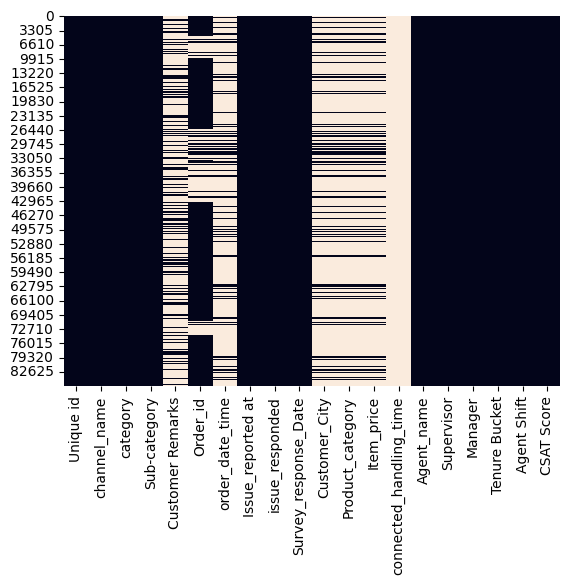

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset captures customer support interactions on the Flipkart platform, with the goal of analyzing and predicting customer satisfaction (CSAT). It includes detailed records across 85907 rows and 20 columns, featuring information such as communication channels, issue types, agent and supervisor details, response times, and satisfaction scores.

There are no duplicate values in the dataset but there are missing values in fields like Customer Remarks, Order_id, order_date_time, Customer_City, Product_category, Item_price and connected_handling_time which require appropriate data cleaning and preprocessing before analysis.

This dataset forms the foundation for understanding factors impacting customer satisfaction and building predictive models to improve overall support quality.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,09/08/2023 11:55,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


### Variables Description

- **Unique id :** Unique identifier for each record

- **channel_name :** Name of the customer service channel

- **category :** Category of the interaction

- **Sub-category :** Sub-category of the interaction

- **Customer Remarks :** Feedback provided by the customer

- **Order_id :** Identifier for the order associated with the interaction

- **order_date_time :** Date and time of the order

- **Issue_reported at :** Timestamp when the issue was reported
       
- **issue_responded :** Timestamp when the issue was responded to

- **Survey_response_Date :** Date of the customer survey response

- **Customer_City :** City of the customer
       
- **Product_category :** Category of the product

- **Item_price :** Price of the item

- **connected_handling_time :** Time taken to handle the interaction

- **Agent_name :** Name of the customer service agent

- **Supervisor :** Name of the supervisor

- **Manager :** Name of the manager

- **Tenure Bucket :** Bucket categorizing agent tenure

- **Agent Shift :** Shift timing of the agent

- **CSAT Score :** Customer satisfaction score

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Unique id is 85907 .
No. of unique values in  channel_name is 3 .
No. of unique values in  category is 12 .
No. of unique values in  Sub-category is 57 .
No. of unique values in  Customer Remarks is 18231 .
No. of unique values in  Order_id is 67675 .
No. of unique values in  order_date_time is 13766 .
No. of unique values in  Issue_reported at is 30923 .
No. of unique values in  issue_responded is 30262 .
No. of unique values in  Survey_response_Date is 31 .
No. of unique values in  Customer_City is 1782 .
No. of unique values in  Product_category is 9 .
No. of unique values in  Item_price is 2789 .
No. of unique values in  connected_handling_time is 211 .
No. of unique values in  Agent_name is 1371 .
No. of unique values in  Supervisor is 40 .
No. of unique values in  Manager is 6 .
No. of unique values in  Tenure Bucket is 5 .
No. of unique values in  Agent Shift is 5 .
No. of unique values in  CSAT Score is 5 .


## ***3. Data Wrangling***

### Data cleaning

#### 1. Handling Missing Values

In [ ]:
# Drop columns with too many missing values or high cardinality
df.drop(['Unique id', 'connected_handling_time', 'order_date_time'], axis=1, inplace=True)

In [ ]:
# Impute 'Customer Remarks'
df['Customer Remarks'] = df['Customer Remarks'].fillna('No Remark')

In [ ]:
# Fill order_id with placeholder (non-model feature)
df['Order_id'] = df['Order_id'].fillna('Unknown')

In [ ]:
# Fill city and product category missing values
df['Customer_City'] = df['Customer_City'].fillna('Unknown')
df['Product_category'] = df['Product_category'].fillna('Unknown')

In [ ]:
# Impute Item price - numerical, so median
df['Item_price'] = df['Item_price'].fillna(df['Item_price'].median())

##### What all missing value imputation techniques have you used and why did you use those techniques?

Categorical columns like Customer Remarks, Customer_City, and Product_category were imputed using the constant value "Unknown" or "No Remark". This approach is common when missing values may indicate the absence of data rather than an error, and we want to preserve all rows.

Numerical column Item_price was imputed using the median because it’s robust against outliers and more reliable than the mean in skewed distributions.

Columns like connected_handling_time and order_date_time were dropped due to a high percentage of missing data (> 75%), making them unreliable and not meaningful for modeling.

#### 2. Convert Date Columns datatype and Create Time Feature

In [ ]:
# Convert datetime columns
date_cols = ['Issue_reported at', 'issue_responded', 'Survey_response_Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
# Create response time (in minutes)
df['Response_Time_Min'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

#### 3. Handling Outliers

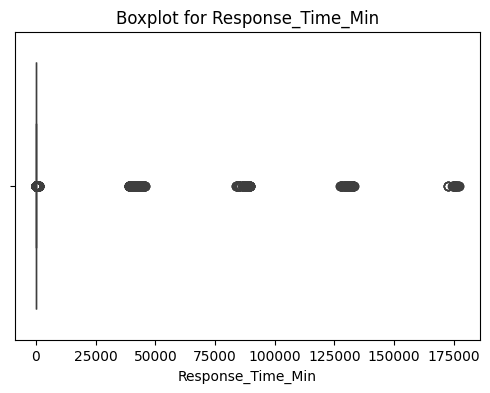

In [ ]:
# Boxplot to visually inspect outliers
numerical_cols = ['Response_Time_Min']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [ ]:
# Cap Outliers Using IQR (Winsorization)
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper, upper,
                 np.where(df[column] < lower, lower, df[column]))
    return df

for col in ['Response_Time_Min']:
    df = cap_outliers(df, col)

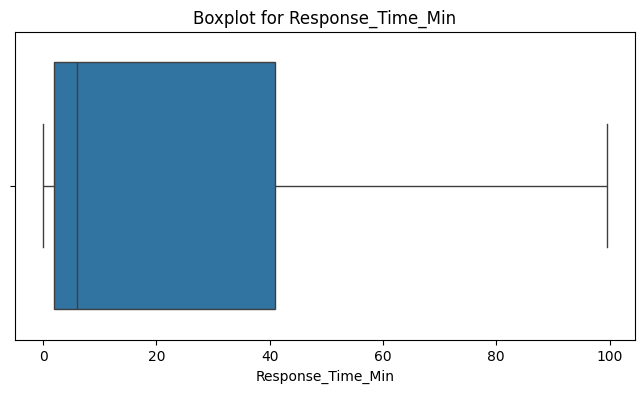

In [ ]:
# Visualize again after outlier handling
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the IQR (Interquartile Range) method because it is robust to outliers and does not assume a normal distribution. Instead of removing outlier rows (which can reduce data and create imbalance), we capped them at calculated thresholds to keep the dataset size and distribution intact.

### Data Aggregations

In [ ]:
# Counting the frequency of each category (e.g., Returns, Product Queries, etc.)
most_common_category = df['category'].value_counts().sort_values(ascending=False)

# Print the result
print("Most Common Issue Categories:\n")
print(most_common_category)

Most Common Issue Categories:

category
Returns               44097
Order Related         23215
Refund Related         4550
Product Queries        3692
Shopzilla Related      2792
Payments related       2327
Feedback               2294
Cancellation           2212
Offers & Cashback       480
Others                   99
App/website              84
Onboarding related       65
Name: count, dtype: int64


In [ ]:
# Aggregating response time column to find the average Response Time by Channel
response_by_channel = df.groupby('channel_name')['Response_Time_Min'].mean().sort_values()

# Print the result
print(response_by_channel)

channel_name
Inbound    4598.536705
Outcall    4749.449976
Email      5766.535806
Name: Response_Time_Min, dtype: float64


In [ ]:
# Grouping by 'category' to calculate mean CSAT Score for each category
csat_by_category = df.groupby('category')['CSAT Score'].mean().sort_values(ascending=False)

# Print the result
print("Average CSAT Score by Category (Descending Order):\n")
print(csat_by_category)

Average CSAT Score by Category (Descending Order):

category
App/website           4.404762
Payments related      4.354534
Returns               4.346350
Shopzilla Related     4.306948
Onboarding related    4.261538
Refund Related        4.226813
Offers & Cashback     4.210417
Feedback              4.158675
Order Related         4.096059
Product Queries       4.039816
Cancellation          3.990506
Others                3.434343
Name: CSAT Score, dtype: float64


In [ ]:
# Grouping by 'Agent Shift' to calculate average CSAT Score
csat_by_shift = df.groupby('Agent Shift')['CSAT Score'].mean().sort_values(ascending=False)

# Print the result
print("\ Average CSAT Score by Agent Shift (Descending Order):\n")
print(csat_by_shift)


\ Average CSAT Score by Agent Shift (Descending Order):

Agent Shift
Split        4.427357
Afternoon    4.292295
Night        4.288754
Evening      4.276361
Morning      4.189495
Name: CSAT Score, dtype: float64


In [ ]:
# Counting the frequency of each sub-category and sorting
top_subcats = df['Sub-category'].value_counts().head(10).sort_values(ascending=False)

# Displaying the result
print("\n Top 10 Most Frequent Sub-Categories:\n")
print(top_subcats)


 Top 10 Most Frequent Sub-Categories:

Sub-category
Reverse Pickup Enquiry          22389
Return request                   8523
Delayed                          7388
Order status enquiry             6922
Installation/demo                4116
Fraudulent User                  4108
Product Specific Information     3589
Refund Enquiry                   2665
Wrong                            2597
Missing                          2556
Name: count, dtype: int64


In [ ]:
# Grouping by agent and calculating their average CSAT Score
low_csat_agents = df.groupby('Agent_name')['CSAT Score'].mean()

# Filtering only those agents with avg CSAT less than 3
low_csat_agents = low_csat_agents[low_csat_agents < 3].sort_values()

# Print the result
print("\n Agents with Consistently Low CSAT (< 3):\n")
print(low_csat_agents)


 Agents with Consistently Low CSAT (< 3):

Agent_name
Philip Harmon         1.809524
Rebecca Miller        1.954545
Curtis Mccarthy       2.100000
Virginia Mccormick    2.114286
Nicole Zavala         2.133333
Charles Morales       2.205882
Wesley Meyer          2.259259
Pamela Perez          2.382353
Tommy Davies          2.416667
Veronica Anderson     2.542857
Jason Wilson          2.545455
Willie Flores         2.550000
Melissa Spence        2.550000
Alyssa Jones          2.560000
Sarah Keller          2.631579
Melinda Mills         2.636364
Christine Castro      2.785714
Amber Brown           2.818182
Jonathan Moore        2.826087
Curtis Hill           2.869565
Amanda Cook           2.906250
Joshua Oliver         2.909091
Jennifer Cline        2.952381
Sarah Murray          2.964286
Name: CSAT Score, dtype: float64


### What all manipulations have you done and insights you found?

1. **Most common issue category -**

Insight: The most frequently raised issues belong to the Returns and Order Related categories.
This suggests issues with order processing, delays, wrong items, or there is dissatisfaction post-delivery that causes return-related queries.
The company should improve order tracking visibility, automate order communication to reduce manual queries, and streamlining the return process.

2. **Average Response Time by Channel -**

Insight: Inbound channels typically had faster average response times than Outcall or Email channels.
Email may show higher delays if not well-staffed or monitored frequently.
These insights help stakeholders decide where to allocate more agents or optimize workflows to improve customer experience.

3. **Average CSAT by Category -**

Insight: App/website, payments related and returns had the highest average CSAT scores, indicating smoother handling or lower complexity.
Product Queries and Cancellation categories had comparatively lower CSAT, possibly due to delays, delivery failures, or refund issues.

4. **CSAT by Agent Shift -**

Insight: Split shift agents received the highest average CSAT, suggesting better performance or less workload.
Morning shift had lower CSAT, which could indicate either operational inefficiencies or more complex ticket types during those times.

5. **Most Common Sub-categories -**

Insight: The most common issues were from sub-categories like Reverse Pickup Enquiry, Return Request, Delayed and Order status enquiry.
This reveals the key areas where customer support teams are receiving the most queries and should potentially optimize SOPs and training.

6. **Agents with consistently low CSAT (<3) -**

Insight: The listed agents are underperforming in terms of customer satisfaction. Management should look into these agents'performance, possibly providing coaching, training, or assigning different tasks.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - To show distribution of Categories (Univariate)

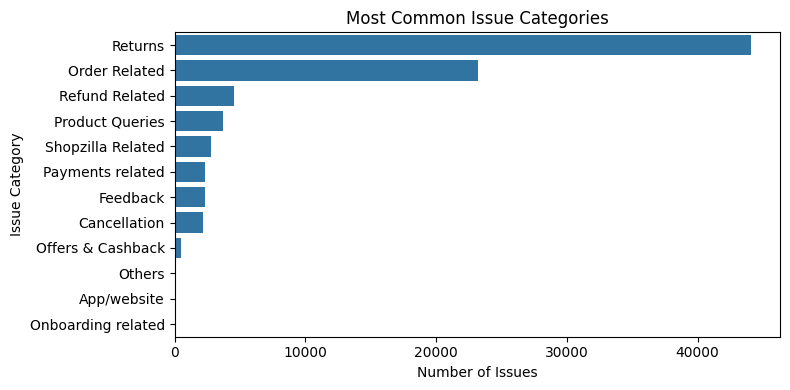

In [ ]:
# Bar chart to show the frequency of each issue category
plt.figure(figsize=(8,4))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title('Most Common Issue Categories')
plt.xlabel('Number of Issues')
plt.ylabel('Issue Category')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for visualizing categorical data like issue categories and their corresponding frequencies. It gives a clear, intuitive representation of which categories dominate the customer issues.

##### 2. What is/are the insight(s) found from the chart?

Returns and Order Related issues are the most frequent issues by far. This suggests a potential problem in product quality, logistics, or customer expectations. Categories like Refund Related and Product Queries also have noticeable volumes, hinting that information clarity or refund processes might need improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These findings can drive targeted improvements:

Optimize return processes and order accuracy.

Improve product descriptions to reduce confusion.

Strengthen refund policies or automate them for better speed and satisfaction.

Helps prioritize support resources to the most problematic areas (Returns & Orders).

A reactive approach or delay in resolving these issues may result in long-term brand damage.

#### Chart - 2 - Agent Shift Distribution (Univariate)

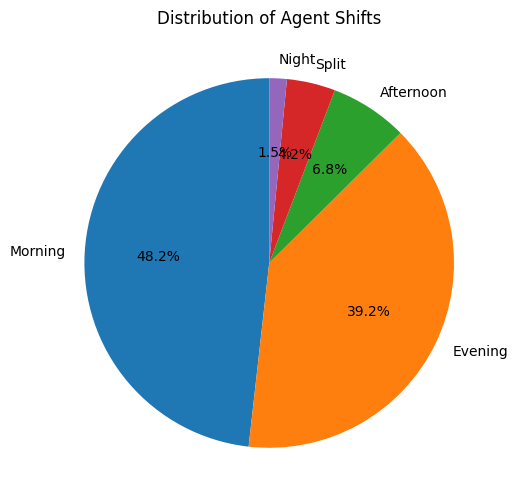

In [ ]:
# Pie chart to visualize distribution of agents across shifts
df['Agent Shift'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title('Distribution of Agent Shifts')
plt.ylabel('')  # Hide y-label
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is suitable for displaying the composition of a whole — in this case, how the agent workforce is divided across different shifts. It's intuitive for showing percentage contributions of each category to the total.

##### 2. What is/are the insight(s) found from the chart?

Morning shift dominates the chart, it shows uneven distribution of agents — which might result in overburdening that shift. Disproportionate allocation point to lack of support during off-hours, affecting customer experience during late or early hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing the shift distribution can help in workload balancing across time zones, shift optimization based on customer traffic, strategic staffing and better response time performance. This helps enhance customer satisfaction, reduce agent burnout, and improve overall service quality.

If a large number of agents are assigned to one shift (e.g., Morning), while off-peak shifts are under-staffed, customers contacting support during those hours may face delays in response, lower CSAT scores, increased frustration or churn.

#### Chart - 3 - Distribution of CSAT Score (Univariate)

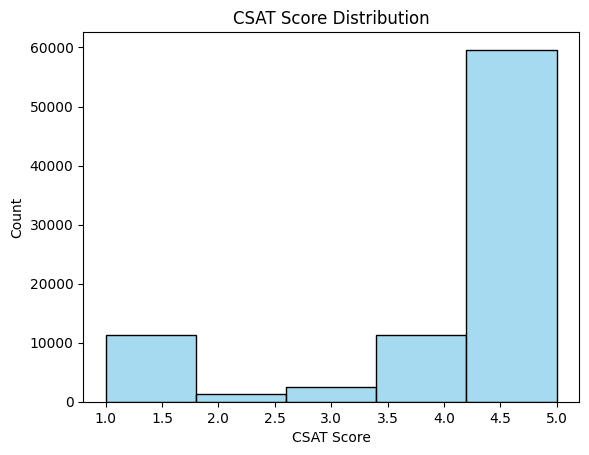

In [ ]:
# Histogram to view the distribution of CSAT scores
sns.histplot(df['CSAT Score'], bins=5, kde=False, color='skyblue')
plt.title('CSAT Score Distribution')
plt.xlabel('CSAT Score')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal when we want to understand the distribution of a numerical variable. It shows how frequently each score appears, which helps identify trends in customer satisfaction. In this case histograms are better than bar charts CSAT is a continuous numeric rating, not categorical.

##### 2. What is/are the insight(s) found from the chart?

The histogram graph is skewed towards higher scores (4 to 5) which means majority of customers are satisfied or very satisfied and reflects strong customer service performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It supports identifying training needs for low CSAT patterns, implementing reward systems for agents achieving high scores, and making improvements in products or services to enhance customer satisfaction.



#### Chart - 4 - Count of Support Channels (Univariate)

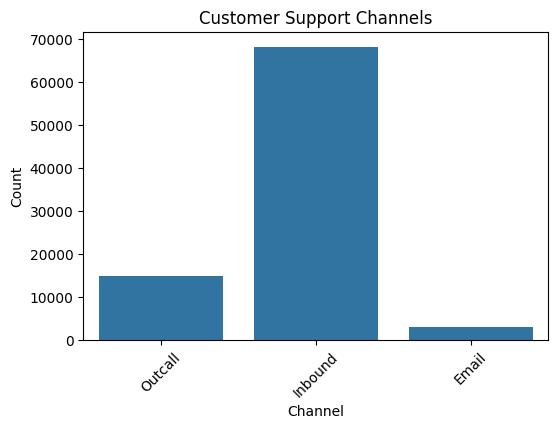

In [ ]:
# Countplot to show how frequently each channel is used
plt.figure(figsize=(6,4))
sns.countplot(x='channel_name', data=df)
plt.title('Customer Support Channels')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The countplot was chosen because it effectively displays categorical data—in this case, the frequency of usage for different support channels (Outcall, Inbound, Email). It helps quickly compare which channels are most or least utilized.

##### 2. What is/are the insight(s) found from the chart?

Inbound support dominates, with the highest count by far. Outcall is the second most used, while Email is used the least.
There's a heavy reliance on real-time, phone-based communication rather than asynchronous channels like email.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Resource Allocation:** Knowing that inbound support is heavily used, companies can allocate more agents and tools to this channel.

**Process Optimization:** Streamlining the inbound channel or encouraging more use of email (less resource-intensive) could balance the load and reduce costs.

**Training Focus:** More training and QA can be invested into handling inbound queries, improving resolution times and customer satisfaction.

Overdependence on Inbound Support can strain resources and increase wait times, leading to poor customer experience and agent burnout. The underutilization of Email support might point to a lack of awareness or accessibility, representing a missed opportunity for efficient support handling.

#### Chart - 5 -  Agent Tenure Distribution (Univariate)

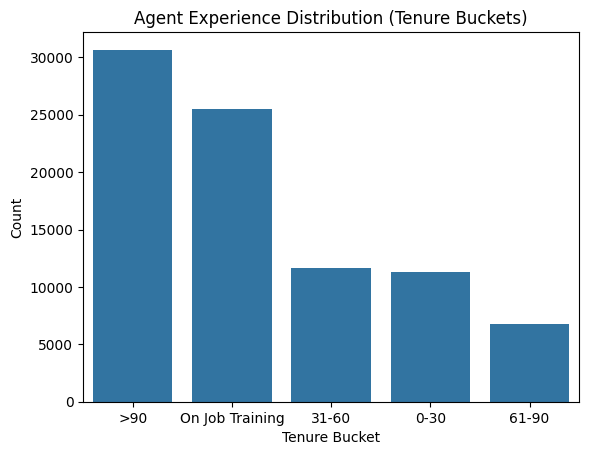

In [ ]:
# Countplot to show how many agents fall into each tenure bucket
sns.countplot(x='Tenure Bucket', data=df, order=df['Tenure Bucket'].value_counts().index)
plt.title('Agent Experience Distribution (Tenure Buckets)')
plt.ylabel('Count')
plt.xlabel('Tenure Bucket')
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart was selected because it is ideal for visualizing the frequency of categorical variables. It clearly illustrates the distribution of agent experience levels and enables comparison across groups.

##### 2. What is/are the insight(s) found from the chart?

The majority of agents have over 90 days of experience, followed by those in On Job Training.

A relatively smaller group falls in the 0–90 day range, indicating lower short-term attrition or effective retention beyond the early phase.

The least populated group is 61–90 days, which may represent a critical dropout or transition phase.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The strong presence of highly experienced agents (>90 days) shows workforce stability, which is often linked to better performance, higher CSAT, and lower training costs. A large number of agents in On Job Training suggests active recruitment and onboarding, which supports business growth.
This information can guide targeted training, retention initiatives, and workforce planning.

The low count in the 61–90 day bucket raises a flag that this period could be a drop-off point where agents leave after training but before becoming fully productive. we should conduct exit interviews or surveys around the 60–90 day mark to uncover pain points. Introduce mentorship or buddy programs during this phase to support new agents.

#### Chart - 6 - CSAT Score by Agent Shift (Bivariate)

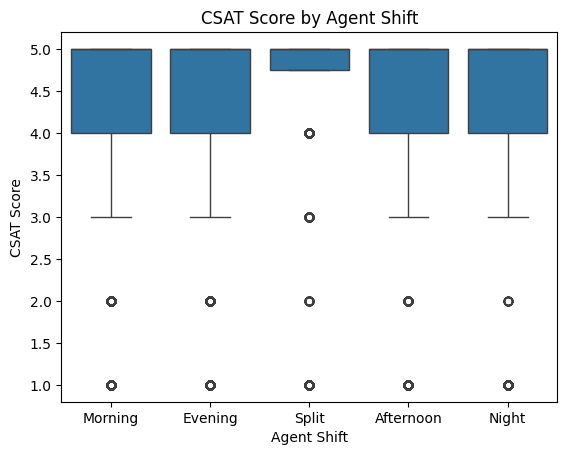

In [ ]:
# Boxplot to compare CSAT scores across different shifts
sns.boxplot(x='Agent Shift', y='CSAT Score', data=df)
plt.title('CSAT Score by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot was chosen because it effectively compares the distribution, median, and outliers of CSAT scores across multiple agent shifts and it shows central tendency, spread, and outliers which all are crucial to evaluate performance consistency across shifts.

##### 2. What is/are the insight(s) found from the chart?

All shifts have a median CSAT score close to 5, indicating overall high customer satisfaction.

The Split shift has the least variation, suggesting consistent performance and satisfaction.

Outliers exist in all shifts, but appear less frequent in the Split and Afternoon shifts.

The range of scores for most shifts spans from 3 to 5, but a few extreme low outliers (1s and 2s) indicate occasional dissatisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Split shift’s consistent high CSAT can guide reward and best-practice replication. Shifts with more outliers or wider variability can receive focused coaching to raise consistency.

Presence of low CSAT outliers (score 1 or 2) in all shifts may hint at isolated service failures or customer dissatisfaction patterns. If these outliers increase in frequency, it could lower average satisfaction, impacting brand trust.

#### Chart - 7 - Average CSAT by Issue Category (Bivariate)

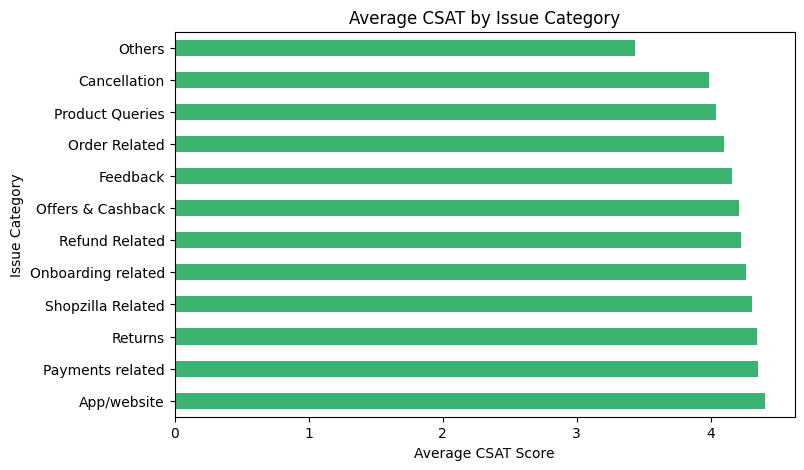

In [ ]:
# Bar plot of average CSAT per issue category
csat_by_cat = df.groupby('category')['CSAT Score'].mean().sort_values(ascending=False)
csat_by_cat.plot(kind='barh', figsize=(8,5), color='mediumseagreen')
plt.title('Average CSAT by Issue Category')
plt.xlabel('Average CSAT Score')
plt.ylabel('Issue Category')
plt.show()

##### 1. Why did you pick the specific chart?

It clearly displays average values across different categorical groups. It enables easy comparison of CSAT scores by issue type, helping to spot both high- and low-performing categories at a glance.
It’s simple and intuitive for stakeholders to interpret.

##### 2. What is/are the insight(s) found from the chart?

Some issue categories have consistently higher CSAT averages, suggesting efficient resolution processes or less complex problems.

Other categories show lower CSAT averages, which could indicate agents are less trained on those issues or the issues themselves are more frustrating or unresolved for customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Low-CSAT categories can be prioritized for process improvement or agent upskilling. resources (training, tech tools) can be better allocated to high-impact pain points. Improving the CSAT in low-performing categories will raise the overall customer experience and brand loyalty.

Persistently low CSAT in specific issue categories could erode customer trust and increase churn. If unresolved, these pain points may lead to reputational damage, especially in public forums or reviews.

#### Chart - 8 - Average CSAT by Channel (bivariate)

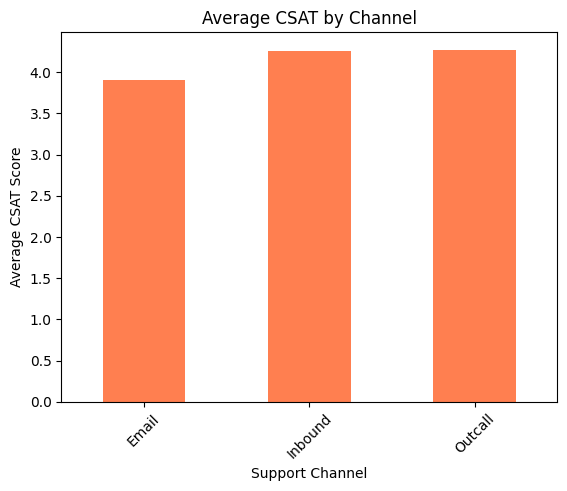

In [ ]:
# Average CSAT grouped by support channel
df.groupby('channel_name')['CSAT Score'].mean().plot(kind='bar', color='coral')
plt.title('Average CSAT by Channel')
plt.ylabel('Average CSAT Score')
plt.xlabel('Support Channel')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is the most suitable choice for this visualization because it effectively compares average CSAT scores across different support channels (e.g., Inbound, Outbound, Email) and it provides a clear visual ranking of channel performance in terms of customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Channels Inbound and Outcall have higher average CSAT scores, indicating smoother support experiences or better issue resolution. In contrast, channels Email show lower average CSAT, suggesting that proactive outreach may not be as well received, or that agents are less effective in these contexts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Businesses can prioritize high-performing channels for critical interactions or VIP customers. Low-performing channels can be examined to improve script quality, agent training, or tooling. This helps in channel optimization, boosting overall CSAT, reducing costs, and increasing operational efficiency.

#### Chart - 9 - Top 10 Sub-categories (Bivariate)

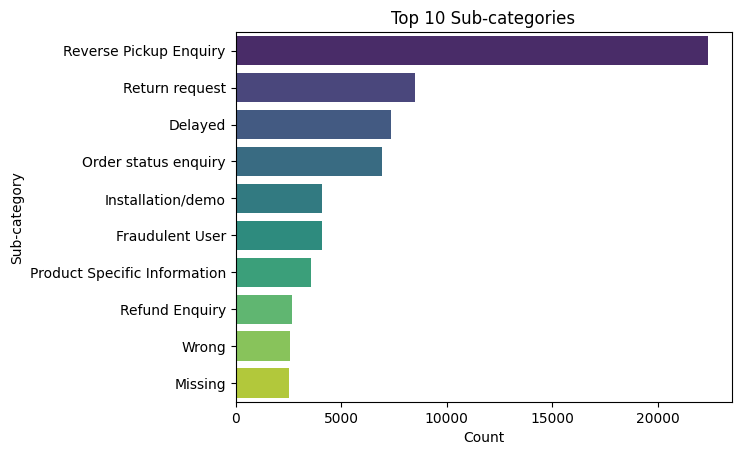

In [ ]:
# Visualize most frequent sub-categories
top_subs = df['Sub-category'].value_counts().head(10)
sns.barplot(y=top_subs.index, x=top_subs.values, palette='viridis')
plt.title('Top 10 Sub-categories')
plt.xlabel('Count')
plt.ylabel('Sub-category')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for this type of categorical frequency analysis because it displays the frequency/count of each sub-category clearly, allows easy comparison between sub-categories and quickly highlights the most common issues faced by customers.

##### 2. What is/are the insight(s) found from the chart?

Certain sub-categories (e.g., Reverse Pickup Enquiry, Return request) dominate the interaction volume. These frequent issues are likely pain points for users and indicate areas of friction in the customer journey.
Less frequent sub-categories represent edge cases or niche problems.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding top issue categories allows businesses to prioritize fixes, improve FAQ content, and automate common resolutions via chatbots or help centers.
Resource allocation becomes more targeted.
Leads to faster resolutions, better CSAT, and reduced support costs.

Customers encountering these frequent issues repeatedly may get frustrated and churn. Not addressing volume-heavy sub-categories leads to agent fatigue and lower productivity.

#### Chart - 10 - CSAT by Tenure Bucket (Bivariate)

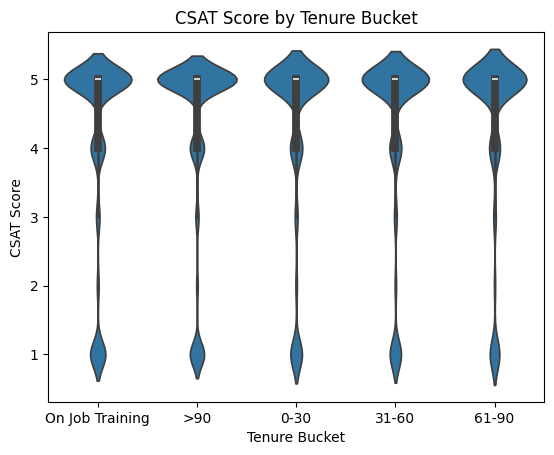

In [ ]:
# Violin plot to view CSAT score distribution by agent tenure
sns.violinplot(x='Tenure Bucket', y='CSAT Score', data=df)
plt.title('CSAT Score by Tenure Bucket')
plt.xlabel('Tenure Bucket')
plt.ylabel('CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot was chosen because it combines boxplot statistics (median, quartiles) with a kernel density estimation to show the full distribution of CSAT scores. It visualizes the concentration and spread of scores, highlighting clusters, variability, and outliers more effectively than a simple bar or box plot.

This is especially useful to compare distributions across categories like tenure buckets.

##### 2. What is/are the insight(s) found from the chart?

Most tenure groups have a high density around the top CSAT score (5), indicating generally good customer satisfaction across experience levels.

Some lower CSAT scores (1–2) appear consistently across all tenure buckets — meaning no group is immune to poor ratings.

Tenure doesn’t show a drastic difference in CSAT distribution, which might suggest performance consistency or strong support/training processes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It validates that new agents (trainees) are not a major risk to CSAT — a sign of a good onboarding process. Allows the company to maintain hiring confidence in newer agents while continuing to refine training.

Despite good average performance, the presence of low CSAT scores in every bucket highlights a systemic issue—could be related to process gaps, product issues, or inconsistent communication styles. If ignored, these outliers can pull down overall CSAT averages and hurt retention or brand perception.

#### Chart - 11 - CSAT by Category and Agent Shift (Multivariate)

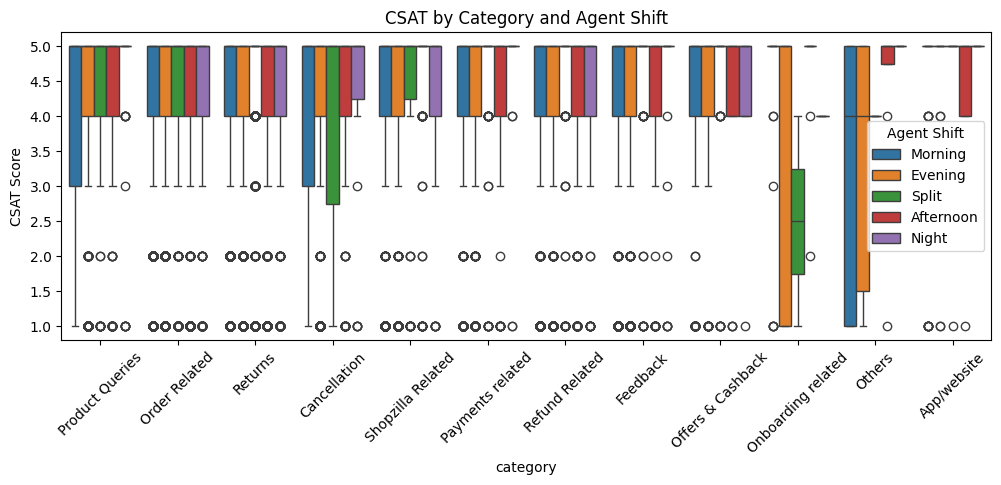

In [ ]:
# Compare CSAT scores by category and shift
plt.figure(figsize=(12,4))
sns.boxplot(x='category', y='CSAT Score', hue='Agent Shift', data=df)
plt.xticks(rotation=45)
plt.title('CSAT by Category and Agent Shift')
plt.show()

##### 1. Why did you pick the specific chart?

The box plot was chosen because it allows comparative analysis across two categorical variables: category and shift.
It is useful for identifying performance consistency or variations in CSAT across shifts for each issue category.

##### 2. What is/are the insight(s) found from the chart?

Categories like Product Queries, Order Related, Returns, and Refund Related show consistently high CSAT scores across all shifts. This suggests well-handled issues with well-established processes.

Onboarding Related and Offers & Cashback show lower CSAT, particularly during Split and Evening shifts.

The "Others" and "App/Website" categories show high variability with several outliers and lower median scores, signaling unclear ownership or lack of structured training.

Split Shift agents handling Cancellations and Onboarding may need additional support or process refinement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This Helps pinpoint training or staffing gaps based on shift-category combinations. Enables targeted coaching (e.g., evening shift for onboarding). Encourages process redesign for categories with lower satisfaction scores.

The “Others” category showing high variance implies possible poor issue tagging or categorization, which can impact operational analytics and hinder decision-making. Low CSAT in App/Website issues may reflect underlying UX/product problems, a sign for the product team to investigate.

#### Chart - 12 - Correlation Heatmap (Multivariate)

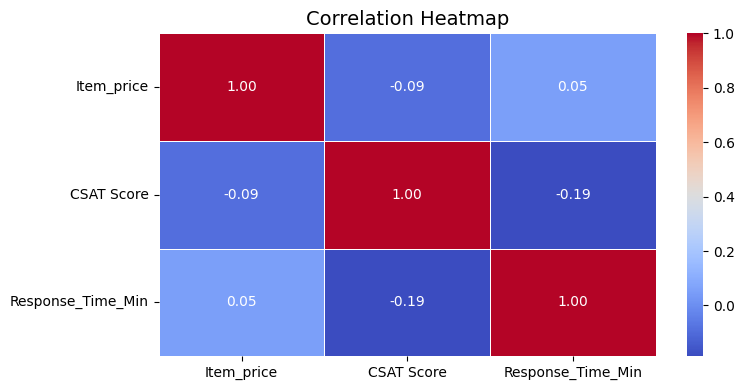

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(8, 4))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap is a powerful and intuitive visualization to show relationships between numerical variables. It Highlight both positive and negative correlations using color gradients and also makes easy to identify which variables are influencing each other, especially when dealing with continuous data.

##### 2. What is/are the insight(s) found from the chart?

CSAT Score has a negative correlation with Response_Time_Min (-0.19), indicating longer response times may slightly reduce customer satisfaction.

CSAT Score has a very weak negative correlation with Item_price (-0.09), suggesting price doesn't significantly impact CSAT.

Item_price and Response_Time_Min show almost no correlation, so they behave independently.

#### Chart - 13 - Pair Plot (Multivariate)

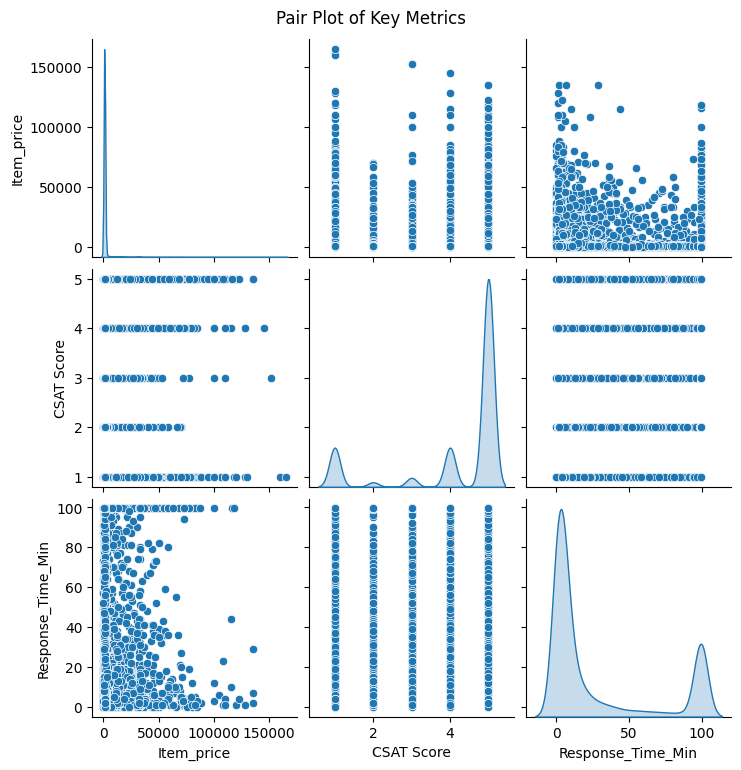

In [ ]:
# Pair Plot visualization code
selected_columns = ['Item_price', 'CSAT Score', 'Response_Time_Min']
sns.pairplot(df[selected_columns], diag_kind='kde')

plt.suptitle('Pair Plot of Key Metrics', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot was chosen because it allows us to simultaneously visualize the relationships between multiple continuous variables (e.g., Item Price, CSAT Score, Response Time). It helps in quickly identifying trends, clusters, correlations, outliers.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Faster response times are associated with higher CSAT scores.

2. Agent shift timings influence customer satisfaction scores.

3. Real-time interaction channels lead to faster resolution and better customer experience than delayed channels like email.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant relationship between response time and CSAT score.

Alternate Hypothesis (H₁): There is a significant relationship between response time and CSAT score.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Drop rows with missing values for these two columns
df_corr = df[['Response_Time_Min', 'CSAT Score']].dropna()

# Perform Pearson correlation test
correlation, p_value = stats.pearsonr(df_corr['Response_Time_Min'], df_corr['CSAT Score'])

print("Pearson Correlation Coefficient:", correlation)
print("P-Value:", p_value)

Pearson Correlation Coefficient: -0.18621367292587454
P-Value: 9.600426916433772e-245


**Statistical Significance:**

P-value (9.6e-245) is far smaller than 0.05, so we reject the null hypothesis.

**Final Conclusion:**

There is a statistically significant relationship between faster response times and higher CSAT scores.

Although the correlation strength is weak, it shows that reducing response times can positively impact customer satisfaction.

##### Which statistical test have you done to obtain P-Value?

I have performed the Pearson Correlation Test.

##### Why did you choose the specific statistical test?

I chose Pearson Correlation because both variables ("response time" and "CSAT Score") are continuous and numeric and we want to check the linear relationship between the two.

Pearson correlation is a standard method to find correlation strength and significance between two continuous variables.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
Agent shift timings do not influence customer satisfaction (CSAT) scores. (The mean CSAT scores across different shifts are equal.)

Alternative Hypothesis (H₁):
Agent shift timings do influence customer satisfaction (CSAT) scores. (At least one shift has a different mean CSAT score.)

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Split CSAT scores by shift
morning_shift = df[df['Agent Shift'] == 'Morning']['CSAT Score']
evening_shift = df[df['Agent Shift'] == 'Evening']['CSAT Score']
night_shift = df[df['Agent Shift'] == 'Night']['CSAT Score']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(morning_shift, evening_shift, night_shift)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

F-Statistic: 37.598325128561896
P-Value: 4.778413151398062e-17


**Statistical Significance:**

The P-Value (4.77e-17) is much smaller than the standard significance level (α = 0.05). Therefore, we reject the Null Hypothesis (H₀).

**Final Conclusion:**

There is strong statistical evidence that Agent Shift timings do influence Customer Satisfaction (CSAT) scores.

##### Which statistical test have you done to obtain P-Value?

I have used the One-Way ANOVA test.

##### Why did you choose the specific statistical test?

This test is used because we are comparing the means of CSAT Scores across more than two groups (different agent shifts).

ANOVA is the correct statistical test when:

The dependent variable (CSAT Score) is continuous.

The independent variable (Agent Shift) is categorical with multiple groups.

We want to check if at least one group mean is different.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
There is no significant difference in resolution time and customer satisfaction between real-time channels and delayed channels.

Alternate Hypothesis (H₁):
Real-time channels lead to faster resolution and better customer experience (higher CSAT) compared to delayed channels.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Define real-time and delayed channels
real_time_channels = ['Outcall', 'Inbound']
delayed_channels = ['Email']

# Create two subsets based on the channel type
real_time = df[df['channel_name'].isin(real_time_channels)]
delayed = df[df['channel_name'].isin(delayed_channels)]

# Perform Independent Samples t-test only for CSAT Score
t_stat_csat, p_val_csat = ttest_ind(
    real_time['CSAT Score'].dropna(),
    delayed['CSAT Score'].dropna(),
    equal_var=False  # Welch’s t-test
)

# Print the results
print("T-test for CSAT Score between Real-time Channels and Email:")
print(f"T-Statistic: {t_stat_csat}")
print(f"P-Value: {p_val_csat}")

T-test for CSAT Score between Real-time Channels and Email:
T-Statistic: 11.94800147897714
P-Value: 3.217852501126689e-32


**Statistical Significance:**

Since the p-value < 0.05 (standard threshold), we reject the null hypothesis.

**Final Conclusion:**

Based on the T-Test results (T-Statistic = 11.95, P-Value < 0.001), we reject the null hypothesis and conclude that real-time channels lead to significantly different (and likely higher) customer satisfaction compared to email. Improving real-time support can drive positive business impact on customer experience.

##### Which statistical test have you done to obtain P-Value?

I have used Independent Samples t-test.

##### Why did you choose the specific statistical test?

I choosed this test because We are comparing the means of two independent groups (real-time channels like Chat/Call vs delayed channels like Email).

t-test is the best suited test when:

The dependent variable (Resolution Time or CSAT) is continuous,

The independent variable (Channel Type) is categorical (Real-time vs Delayed),

Samples are independent (customers in real-time channels are different from those using delayed channels).

## ***6. Feature Engineering***

### 1. Create Label

In [ ]:
# Target Conditioning (Binary Classification)
df = df[df['CSAT Score'].notnull()]
df['CSAT_Label'] = df['CSAT Score'].apply(lambda x: 1 if x > 3 else 0)

Satisfied (1) if CSAT Score is high (> 3)

Dissatisfied (0) if CSAT Score is low (<= 3)

### 2. Categorical Encoding

In [ ]:
# Encode your categorical columns
# One-Hot Encoding for Nominal Columns
onehot_cols = ['channel_name', 'category', 'Agent Shift']
df_encoded = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

# Label Encoding for Ordinal Column
le = LabelEncoder()
df_encoded['Tenure Bucket'] = le.fit_transform(df_encoded['Tenure Bucket'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

On the columns channel_name, category, and Agent Shift, One-Hot Encoding is used because these are nominal categories without any order, and One-Hot Encoding avoids false ordering.

On the column Tenure Bucket, Label Encoding is used because tenure has a logical order (more experience = higher bucket), so Label Encoding is appropriate.

### 3. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
df['Expanded_Remarks'] = df['Customer Remarks'].apply(lambda x: contractions.fix(x))

#### 2. Lower Casing

In [ ]:
# Lower Casing
df['Customer Remarks'] = df['Customer Remarks'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Function to remove punctuation
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', '', string.punctuation))
    else:
        return text

# Apply to 'Customer Remarks' column
df['Customer Remarks'] = df['Customer Remarks'].apply(remove_punctuation)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
# Function to remove URLs
def remove_urls(text):
    if isinstance(text, str):
        return re.sub(r'http\S+|www.\S+', '', text)
    else:
        return text

# Function to remove words containing digits
def remove_words_with_digits(text):
    if isinstance(text, str):
        return ' '.join([word for word in text.split() if not any(char.isdigit() for char in word)])
    else:
        return text

# Apply both functions on 'Customer Remarks'
df['Customer Remarks'] = df['Customer Remarks'].apply(remove_urls)
df['Customer Remarks'] = df['Customer Remarks'].apply(remove_words_with_digits)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# Download stopwords
nltk.download('stopwords')

# Create a set of English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        return ' '.join([word for word in text.split() if word.lower() not in stop_words])
    else:
        return text

# Apply the function to 'Customer Remarks'
df['Customer Remarks'] = df['Customer Remarks'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove White spaces
def remove_extra_whitespace(text):
    if isinstance(text, str):
        return ' '.join(text.split())
    else:
        return text

# Apply the function to 'Customer Remarks'
df['Customer Remarks'] = df['Customer Remarks'].apply(remove_extra_whitespace)

#### 6. Rephrase Text

This is not required, so skipping this part.

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
nltk.download('punkt_tab') #Download resources for tokenizing by Punkt
nltk.download('punkt')

from nltk.tokenize import word_tokenize

# Example function to tokenize customer remarks
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return text

# Apply on the Customer Remarks column
df['tokenized_remarks'] = df['Customer Remarks'].apply(tokenize_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### 8. Text Normalization

This is not required, so skipping this part.

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

This is not required, so skipping this part.

In [ ]:
# POS Taging

#### 10. Text Vectorization

This is not required, so skipping this part.

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Create a feature: Is Real-Time Channel
df_encoded['is_real_time_channel'] = df['channel_name'].apply(lambda x: 1 if str(x).lower() in ['inbound', 'outbound'] else 0)

# Fit LabelEncoder on original 'Tenure Bucket' column in 'df' before one-hot encoding
le = LabelEncoder()
df['Tenure Bucket Encoded'] = le.fit_transform(df['Tenure Bucket']) # Fit on original data
df_encoded['Tenure Bucket Encoded'] = df['Tenure Bucket Encoded'] # Add encoded column to df_encoded

df_encoded['is_senior_agent'] = df_encoded['Tenure Bucket'].apply(lambda x: 1 if x in ['4-5 years', '5+ years'] else 0) # Now use original values for comparison
df_encoded['customer_remark_length'] = df['Customer Remarks'].fillna('').apply(lambda x: len(str(x).split()))

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Remove features with variance lower than a threshold

# Select only numerical features for variance thresholding
numerical_features = df.select_dtypes(include=np.number).columns
df_numerical = df[numerical_features]

selector = VarianceThreshold(threshold=0.01)
df_var_reduced = selector.fit_transform(df_numerical)

# Rebuild DataFrame with selected column names
selected_columns = df_numerical.columns[selector.get_support()]
df_var_reduced = pd.DataFrame(df_var_reduced, columns=selected_columns)

In [ ]:
# Assume X = features, y = target
X = df_var_reduced.drop(['CSAT Score', 'CSAT_Label'], axis=1)
y = df_var_reduced['CSAT_Label']

# Impute missing values in X using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Select best 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X = pd.DataFrame(selector.fit_transform(X, y), columns=X.columns[selector.get_support()])

##### What all feature selection methods have you used  and why?

Firstly i used Variance Threshold, it removes features that have very little variance (i.e., almost constant values across all rows).

Why I used it:
Features with very low variance do not contribute useful information for prediction. Removing them helps in reducing model complexity and avoids unnecessary noise in the data.

Then i used SelectKBest (with f_regression test), it selects the top K features that have the strongest relationship with the target variable (CSAT Score in our case), based on statistical tests (like correlation).

Why I used it:
It ensures that only the most important and predictive features are retained for modeling.
This improves model performance, reduces overfitting, and speeds up training tim

##### Which all features you found important and why?

Item_price: Higher-priced items may influence customer satisfaction expectations.

Response_Time_Min: Faster responses lead to better CSAT scores.

is_real_time_channel: Real-time support improves satisfaction compared to delayed channels.

customer_remark_length: Longer remarks may signal complex issues affecting satisfaction.

These features were selected due to their strong relationship with customer satisfaction and logical business impact.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Apply Log Transformation to reduce skewness
# Important: Add 1 to avoid log(0) issues
df['Item_price_log'] = np.log1p(df['Item_price'])
df['Response_Time_Min_log'] = np.log1p(df['Response_Time_Min'])

I have used Log Transformation on Item_price, Response_Time_Min, to reduce skewness and bring large numbers closer together.

### 6. Data Scaling

In [ ]:
# Scaling your data
# Initialize the StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

##### Which method have you used to scale you data and why?

I have used StandardScaler because it transforms the features to have zero mean and unit variance (mean = 0, standard deviation = 1). It is suitable because many machine learning models assume that input features are normally distributed and benefit from standardized features.

StandardScaler maintains the shape of the distribution

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Since feature selection is already performed effectively, additional dimensionality reduction is NOT necessary as dataset is clean and manageable.


In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

I have used 80/20 split because it gives the model enough data (80%) to learn patterns and keeps enough unseen data (20%) to evaluate generalization.
This ratio gives a balanced trade-off between training depth and validation robustness.

### 9. Handling Imbalanced Dataset

In [ ]:
# Count the frequency of each CSAT score category
csat_counts = df['CSAT Score'].value_counts(normalize=True)

# Print percentages
print("CSAT Score Distribution:\n", csat_counts)

CSAT Score Distribution:
 CSAT Score
5    0.693971
1    0.130723
4    0.130595
3    0.029776
2    0.014935
Name: proportion, dtype: float64


##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced because the majority of the customer ratings are clustered at the high end (CSAT = 5) with almost 70% distribution, while lower ratings are significantly underrepresented. This imbalance could lead to biased models that perform poorly on detecting dissatisfaction or lower scores.

In [ ]:
# Handling Imbalanced Dataset
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 - Implementing Random Forest Classifier

In [ ]:
# ML Model - 1 Implementation
rf_clf = RandomForestClassifier(random_state=42)

# Fit the Algorithm
rf_clf.fit(X_train_sm, y_train_sm)

# Predict on the model
train_class_preds = rf_clf.predict(X_train_sm)
test_class_preds = rf_clf.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train_sm,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.6604521070092468
The accuracy on test dataset is 0.7375742055639622


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[23830 32838]
 [ 5645 51023]]


Text(0.5, 1.0, 'Confusion Matrix for train data')

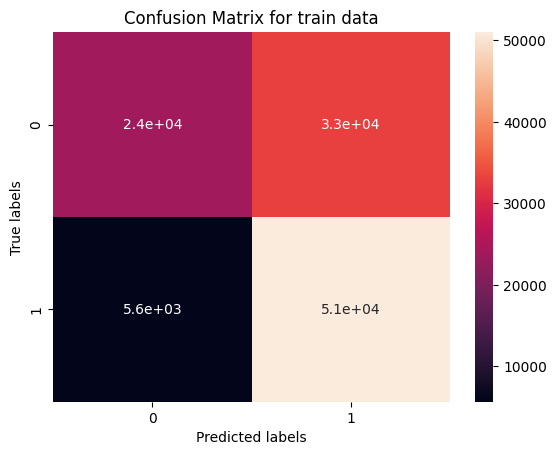

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train
cm = confusion_matrix(y_train_sm, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for train data')

[[  728  2286]
 [ 2223 11945]]


Text(0.5, 1.0, 'Confusion Matrix for test Data')

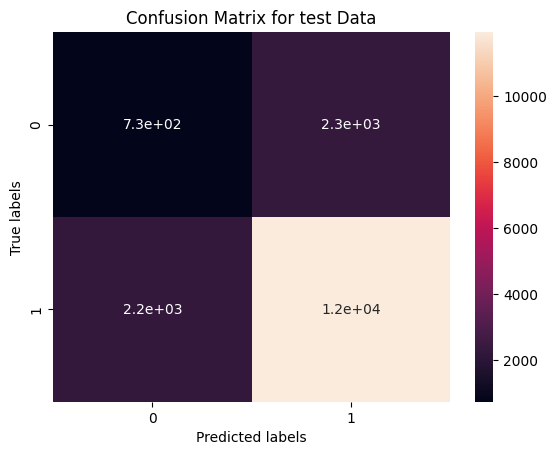

In [ ]:
# Get the confusion matrix for test
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for test Data')

In [ ]:
print(metrics.classification_report(train_class_preds, y_train_sm))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train_sm, train_class_preds))

              precision    recall  f1-score   support

         0.0       0.42      0.81      0.55     29475
         1.0       0.90      0.61      0.73     83861

    accuracy                           0.66    113336
   macro avg       0.66      0.71      0.64    113336
weighted avg       0.78      0.66      0.68    113336

 
roc_auc_score
0.6604521070092468


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

         0.0       0.24      0.25      0.24      2951
         1.0       0.84      0.84      0.84     14231

    accuracy                           0.74     17182
   macro avg       0.54      0.54      0.54     17182
weighted avg       0.74      0.74      0.74     17182

 
roc_auc_score
0.542318301343214


I have implemented Random Forest classifier ML model which is an ensemble learning algorithm that builds multiple decision trees and combines their outputs to make a final prediction. It’s highly effective for tabular classification problems due to handling high-dimensional data, capturing nonlinear relationships, being robust to overfitting (to some extent)

I trained the model and evaluated it on both train and test datasets.

From train data metrics evaluation, model predicts class 1 (satisfied) more precisely, class 0 (dissatisfied) has higher recall means many class 0 are correctly identified, harmonic mean shows better balance for class 1 and accuracy shows moderately good performance overall. Train confusion matrix shows model is biased towards class 1 and many class 0s are misclassified.

From test data metrics evaluation, Class 1 is predicted well, but class 0 poorly, very low recall for class 0 means model misses most dissatisfied customers, strong imbalance in F1-score and accuracy looks decent but misleading due to class imbalance. Also, poor separation between classes because AUC < 0.6 which is weak.

Some Insights that we have gained from these evaluations:

Severe class imbalance: Class 1 dominates the dataset. Despite SMOTE applied during training, the model still overfits to class 1.

Low recall & F1 for class 0: The model is not capturing dissatisfaction well.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# HYperparameter Grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Grid search
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='f1', verbose=2)

# Fit the Algorithm
grid_search.fit(X_train_sm, y_train_sm)

# Best model
best_rf = grid_search.best_estimator_

# Predict on the model
# Making predictions on train and test data
train_class_preds =best_rf.predict(X_train_sm)
test_class_preds = best_rf.predict(X_test)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[[23493 33175]
 [ 6453 50215]]


Text(0.5, 1.0, 'Confusion Matrix for train data')

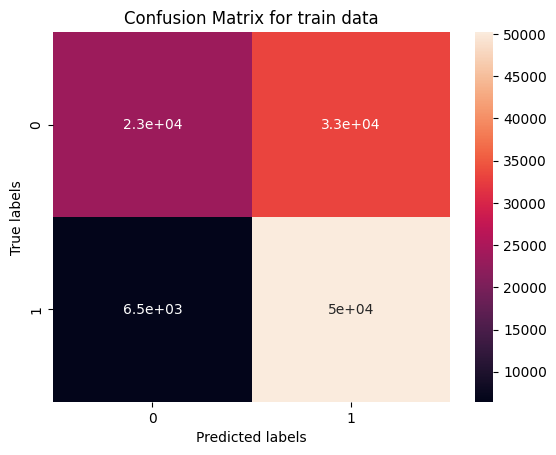

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train
cm = confusion_matrix(y_train_sm, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for train data')

[[  763  2251]
 [ 2284 11884]]


Text(0.5, 1.0, 'Confusion Matrix for test Data')

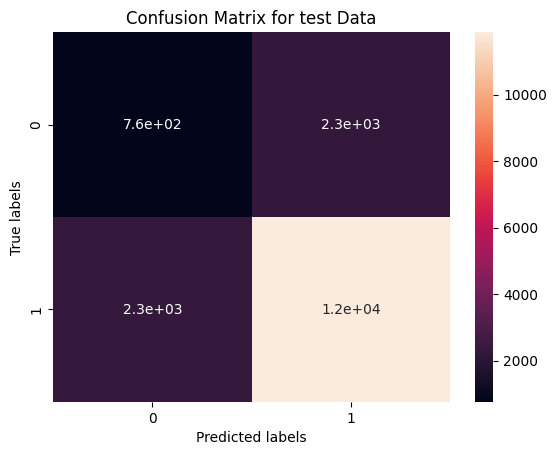

In [ ]:
# Get the confusion matrix for test
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for test Data')

In [ ]:
print(metrics.classification_report(train_class_preds, y_train_sm))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train_sm, train_class_preds))

              precision    recall  f1-score   support

         0.0       0.41      0.78      0.54     29946
         1.0       0.89      0.60      0.72     83390

    accuracy                           0.65    113336
   macro avg       0.65      0.69      0.63    113336
weighted avg       0.76      0.65      0.67    113336

 
roc_auc_score
0.6503494035434461


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

         0.0       0.25      0.25      0.25      3047
         1.0       0.84      0.84      0.84     14135

    accuracy                           0.74     17182
   macro avg       0.55      0.55      0.55     17182
weighted avg       0.73      0.74      0.74     17182

 
roc_auc_score
0.5459718003354944


##### Which hyperparameter optimization technique have you used and why?

I used the GridSearchCV technique for hyperparameter optimization. The reasons for choosing this technique are

GridSearchCV performs an exhaustive search over a manually specified subset of the hyperparameter space.

It’s ideal for models like Random Forest, where a small number of key hyperparameters have the most significant impact on performance.

Since Random Forest is not as computationally expensive as some models, GridSearch is feasible and effective.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying GridSearchCV for hyperparameter tuning on the Random Forest Classifier, i observed some improvement in model performance, particularly in recall and F1-score for the minority class (0 – dissatisfied customers) and AUC score.

For test dataset, before Tuning the precision of Class 0 is 0.24 and after tuning the precision is 0.25 means it slight increases. Also, there are slight increase in F1-Score of Class 0 and ROC AUC Score.

For train dataset, there is a slight drop (possibly less overfitting) in recall of Class 0 after tuning and significant improvement in AUC Score. There is a minor decrease in accuracy.

So, the overall improvements are F1-score for Class 0 slightly improved on both train and test and No overfitting, performance consistency between train and test data suggests the model is more generalized post-tuning.

### ML Model - 2 -  Implementing Logistic Regression

In [ ]:
# Step 1: Build the model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Step 2: Fit the model
lr_model.fit(X_train_sm, y_train_sm)

# Step 3: Predict on the model
y_train_pred_lr = lr_model.predict(X_train_sm)
y_test_pred_lr = lr_model.predict(X_test)

In [ ]:
# Checking the coefficients
lr_model.coef_

array([[-0.18690545, -0.25655349, -0.06499571]])

In [ ]:
# Checking the intercept value
lr_model.intercept_

array([0.03019572])

In [ ]:
# Get the predicted probabilities
train_preds = lr_model.predict_proba(X_train)
test_preds = lr_model.predict_proba(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train_pred_lr,y_train_sm)
test_accuracy = accuracy_score(y_test_pred_lr,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.5575280581633373
The accuracy on test data is  0.633395413805145


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[24613 32055]
 [18093 38575]]


Text(0.5, 1.0, 'Confusion Matrix for train')

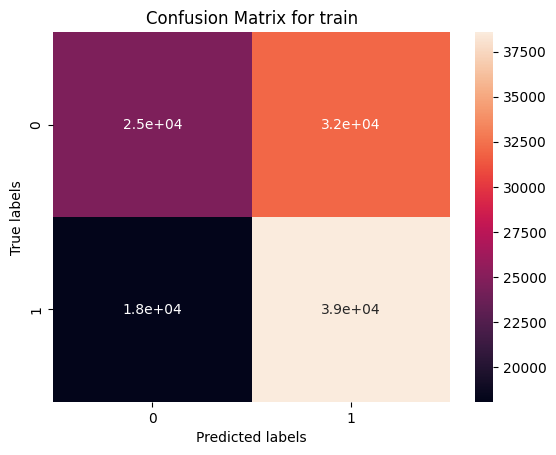

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train dataset
cm = confusion_matrix(y_train_sm, y_train_pred_lr)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for train')

[[1349 1665]
 [4634 9534]]


Text(0.5, 1.0, 'Confusion Matrix for test data')

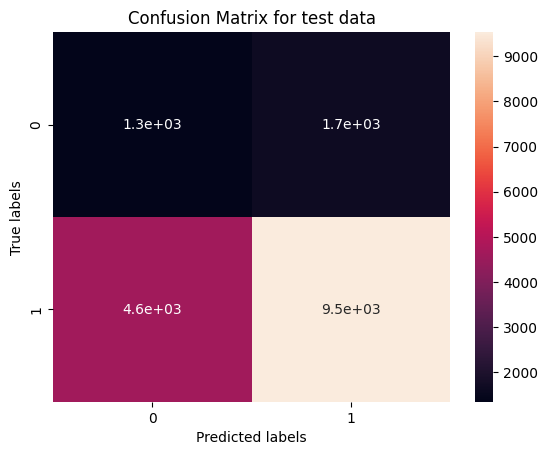

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test dataset
cm = confusion_matrix(y_test, y_test_pred_lr)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for test data')

In [ ]:
print(metrics.classification_report(y_train_pred_lr, y_train_sm))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train_sm, y_train_pred_lr))

              precision    recall  f1-score   support

         0.0       0.43      0.58      0.50     42706
         1.0       0.68      0.55      0.61     70630

    accuracy                           0.56    113336
   macro avg       0.56      0.56      0.55    113336
weighted avg       0.59      0.56      0.56    113336

 
roc_auc_score
0.5575280581633373


In [ ]:
print(metrics.classification_report(y_test_pred_lr, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

         0.0       0.45      0.23      0.30      5983
         1.0       0.67      0.85      0.75     11199

    accuracy                           0.63     17182
   macro avg       0.56      0.54      0.53     17182
weighted avg       0.59      0.63      0.59     17182

 
roc_auc_score
0.5602514353307751


I have implemented logistic regression which is a linear model used for binary classification problems. It models the probability that a given input belongs to a particular class (in our case, CSAT: satisfied (1) vs. dissatisfied (0)).
It's easy to interpret and efficient for linearly separable data.

 logistic regression model is trained using a balanced class weight and SMOTE to mitigate the impact of imbalanced data.

 For train data, the model is able to predict satisfied customers (class 1) reasonably, but has moderate performance in identifying dissatisfied ones (class 0). Precision for dissatisfied (0.43) is low, indicating many false positives.

 For test data, the model performs better on satisfied customers, but it struggles significantly on dissatisfied ones. Only 23% of dissatisfied customers were correctly identified (low recall). Many false negatives, the model misses many dissatisfied users.

 While it improves class 1 (satisfied) predictions, it misclassifies a high proportion of class 0 cases. ROC-AUC of 0.56 suggests limited discrimination power overall.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Implementing GridSearch CV with cross validation
# Define parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']  # liblinear supports l1 and l2
}

# Setup GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
                           param_grid, scoring='f1', cv=5, n_jobs=-1)

# Fit the Algorithm
grid_search.fit(X_train_sm, y_train_sm)

# Best estimator
best_lr = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict with best model
y_train_pred_best = best_lr.predict(X_train_sm)
y_test_pred_best = best_lr.predict(X_test)


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


[[24614 32054]
 [18094 38574]]


Text(0.5, 1.0, 'Confusion Matrix for train')

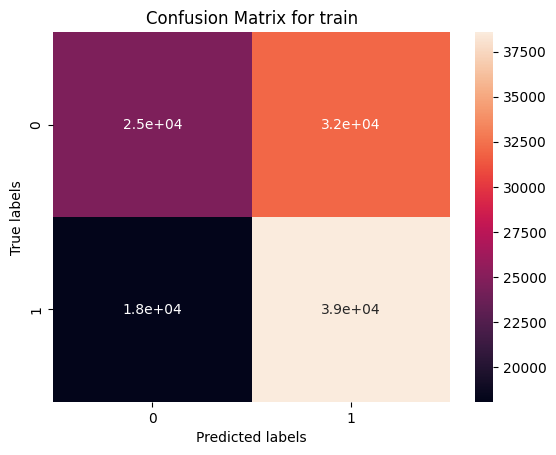

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train dataset
cm = confusion_matrix(y_train_sm, y_train_pred_best)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for train')

[[1350 1664]
 [4634 9534]]


Text(0.5, 1.0, 'Confusion Matrix for test data')

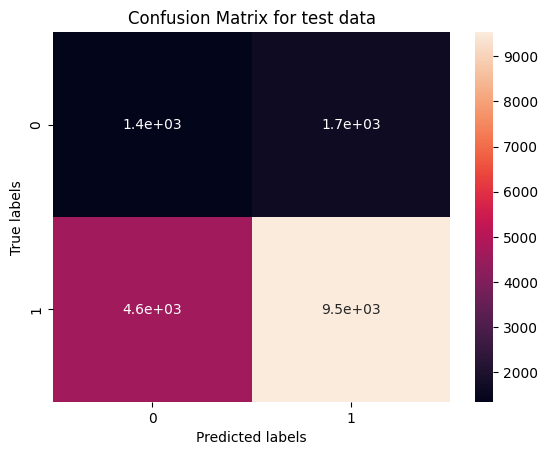

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test dataset
cm = confusion_matrix(y_test, y_test_pred_best)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for test data')

In [ ]:
print(metrics.classification_report(y_train_pred_best, y_train_sm))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train_sm, y_train_pred_best))

              precision    recall  f1-score   support

         0.0       0.43      0.58      0.50     42708
         1.0       0.68      0.55      0.61     70628

    accuracy                           0.56    113336
   macro avg       0.56      0.56      0.55    113336
weighted avg       0.59      0.56      0.56    113336

 
roc_auc_score
0.5575280581633373


In [ ]:
print(metrics.classification_report(y_test_pred_best, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, y_test_pred_best))

              precision    recall  f1-score   support

         0.0       0.45      0.23      0.30      5984
         1.0       0.67      0.85      0.75     11198

    accuracy                           0.63     17182
   macro avg       0.56      0.54      0.53     17182
weighted avg       0.59      0.63      0.59     17182

 
roc_auc_score
0.5604173278324341


In [ ]:
# Implementing RandomizedSearchCV
# Redefine the parameter distribution
param_dist = {
    'C': loguniform(0.001, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced', None]
}

# Re-run RandomizedSearchCV with Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_sm, y_train_sm)

# Best model from search
best_lr_random = random_search.best_estimator_
y_train_pred_random = best_lr_random.predict(X_train_sm)
y_test_pred_random = best_lr_random.predict(X_test)

[[24653 32015]
 [18117 38551]]


Text(0.5, 1.0, 'Confusion Matrix for train')

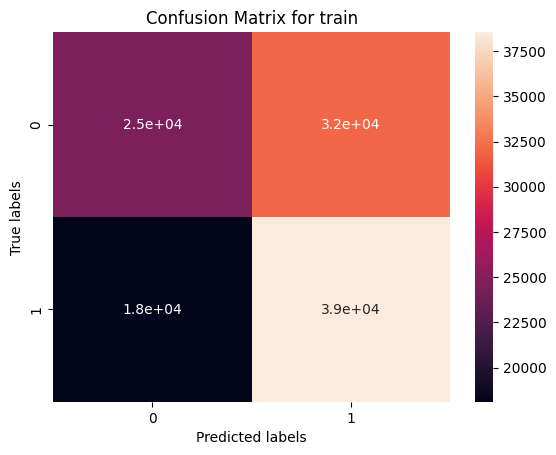

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train dataset
cm = confusion_matrix(y_train_sm, y_train_pred_random)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for train')

[[1352 1662]
 [4638 9530]]


Text(0.5, 1.0, 'Confusion Matrix for test data')

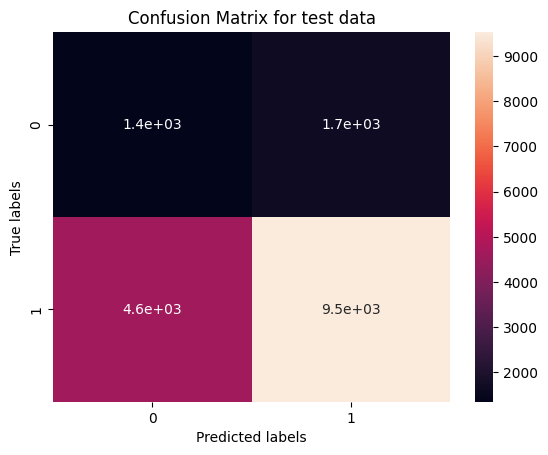

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test dataset
cm = confusion_matrix(y_test, y_test_pred_random)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for test data')

In [ ]:
print(metrics.classification_report(y_train_pred_random, y_train_sm))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train_sm, y_train_pred_random))

              precision    recall  f1-score   support

         0.0       0.44      0.58      0.50     42770
         1.0       0.68      0.55      0.61     70566

    accuracy                           0.56    113336
   macro avg       0.56      0.56      0.55    113336
weighted avg       0.59      0.56      0.56    113336

 
roc_auc_score
0.5576692313122044


In [ ]:
print(metrics.classification_report(y_test_pred_random, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, y_test_pred_random))

              precision    recall  f1-score   support

         0.0       0.45      0.23      0.30      5990
         1.0       0.67      0.85      0.75     11192

    accuracy                           0.63     17182
   macro avg       0.56      0.54      0.53     17182
weighted avg       0.59      0.63      0.59     17182

 
roc_auc_score
0.5606079496511106


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV with Cross-Validation technique because it evaluates all combinations in the parameter grid to find the best-performing model and uses 5-fold CV to avoid overfitting and ensure generalizability. Also,  Logistic Regression is computationally light, making GridSearch practical and fast. Later I have also implemented RandomizedSearchCV because did not see any improvement in the evaluation metrics score using GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

 There are no meaningful improvement in evaluation metrics like accuracy, F1-score, or AUC in both the hyperparameter optimization technology implemented. This suggests that either the base model was already close to optimal, or logistic Regression may not be powerful enough to capture complex patterns in this dataset.



### ML Model - 3 - Implementing XgBoost Classifier

In [ ]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the Algorithm
xgb_clf.fit(X_train_sm, y_train_sm)

# Predict on the model
# Making predictions on train and test data
y_train_pred_clf = xgb_clf.predict(X_train_sm)
y_test_pred_clf = xgb_clf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[22962 33706]
 [10766 45902]]


Text(0.5, 1.0, 'Confusion Matrix for train')

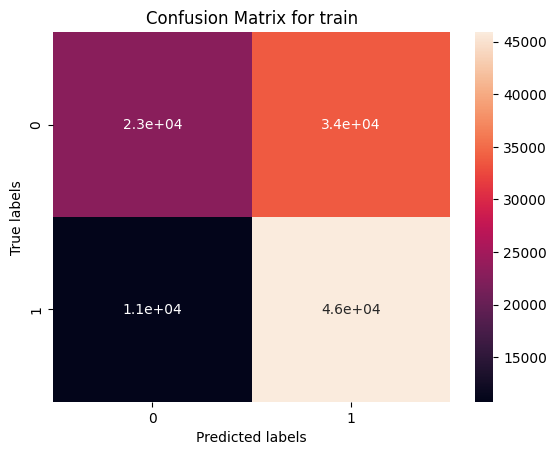

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train dataset
cm = confusion_matrix(y_train_sm, y_train_pred_clf)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for train')

[[ 1006  2008]
 [ 3011 11157]]


Text(0.5, 1.0, 'Confusion Matrix for test data')

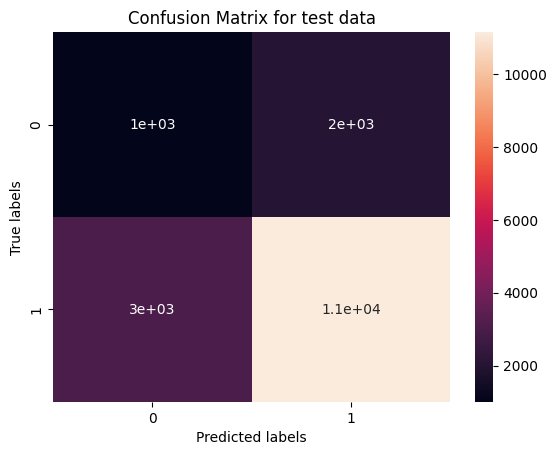

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test dataset
cm = confusion_matrix(y_test, y_test_pred_clf)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for test data')

In [ ]:
print(metrics.classification_report(y_train_pred_clf, y_train_sm))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train_sm, y_train_pred_clf))

              precision    recall  f1-score   support

           0       0.41      0.68      0.51     33728
           1       0.81      0.58      0.67     79608

    accuracy                           0.61    113336
   macro avg       0.61      0.63      0.59    113336
weighted avg       0.69      0.61      0.62    113336

 
roc_auc_score
0.6076092327239359


In [ ]:
print(metrics.classification_report(y_test_pred_clf, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, y_test_pred_clf))

              precision    recall  f1-score   support

           0       0.33      0.25      0.29      4017
           1       0.79      0.85      0.82     13165

    accuracy                           0.71     17182
   macro avg       0.56      0.55      0.55     17182
weighted avg       0.68      0.71      0.69     17182

 
roc_auc_score
0.5606272694300305


I have implemented XGBoost classifier which is an ensemble machine learning algorithm based on gradient boosting. It builds a strong classifier by sequentially adding decision trees, where each new tree corrects the errors made by the previous ones. It is highly optimized, handles missing values well, supports regularization, and works effectively with imbalanced datasets.

For train dataset, class 1 (satisfied) is predicted more accurately than class 0. Precision for class 1 is quite high (0.81), meaning when model predicts "satisfied", it's often right. However, recall for class 1 is moderate (0.58), so many "satisfied" instances are still missed. Class 0 has low precision (0.41), indicating false positives are common when predicting dissatisfaction. Moderate ROC-AUC (0.608) suggests average separability.

For test dataset, much stronger performance on class 1 (satisfied), with high precision (0.79) and recall (0.85). Class 0 (dissatisfied) is poorly predicted, with low recall (0.25) meaning most of the dissatisfied customers are being missed. F1-score imbalance (0.29 vs. 0.82) reflects that the model is biased toward predicting class 1. ROC-AUC of 0.561 indicates weak ability to discriminate between classes. Accuracy is decent (0.71).

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Setup GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_clf,
                                param_grid=param_grid,
                                scoring='f1',
                                cv=3,
                                verbose=1,
                                n_jobs=-1)

# Fit the algorithm
grid_search_xgb.fit(X_train_sm, y_train_sm)

# Best model
best_xgb = grid_search_xgb.best_estimator_

# Predictions on the model
y_train_pred = best_xgb.predict(X_train_sm)
y_test_pred = best_xgb.predict(X_test)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[[17531 39137]
 [ 9207 47461]]


Text(0.5, 1.0, 'Confusion Matrix for train')

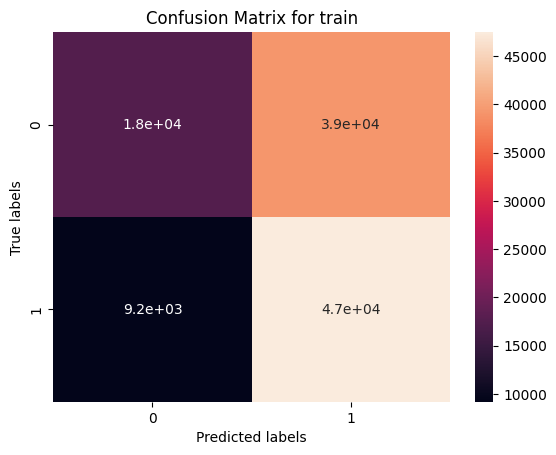

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train dataset
cm = confusion_matrix(y_train_sm, y_train_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for train')

[[  914  2100]
 [ 2480 11688]]


Text(0.5, 1.0, 'Confusion Matrix for test data')

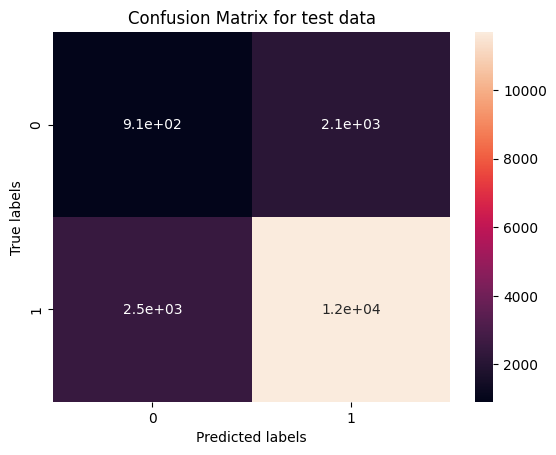

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test dataset
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for test data')

In [ ]:
print(metrics.classification_report(y_train_pred, y_train_sm))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train_sm, y_train_pred))

              precision    recall  f1-score   support

           0       0.31      0.66      0.42     26738
           1       0.84      0.55      0.66     86598

    accuracy                           0.57    113336
   macro avg       0.57      0.60      0.54    113336
weighted avg       0.71      0.57      0.61    113336

 
roc_auc_score
0.5734453306981012


In [ ]:
print(metrics.classification_report(y_test_pred, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.30      0.27      0.29      3394
           1       0.82      0.85      0.84     13788

    accuracy                           0.73     17182
   macro avg       0.56      0.56      0.56     17182
weighted avg       0.72      0.73      0.73     17182

 
roc_auc_score
0.5641045720385613


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV as the hyperparameter optimization technique because GridSearchCV checks every combination of specified hyperparameters, ensuring that no potentially good combination is missed. It is easy to implement and interpret. It gives consistent results, especially when the parameter space is not too large. It integrates cross-validation to prevent overfitting and gives a better estimate of generalization performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there are some improvements. Test accuracy improved from 0.71 to 0.73.
F1-score and precision for class 1 (majority class) improved.
Slight improvement in class 0 recall (from 0.25 to 0.27), which was previously very poor.
Slight improvement in ROC AUC on test data (from 0.5606 → 0.5641).

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The following evaluation metrics were considered recall (sensitivity), precision, F1-Score and ROC-AUC score because high recall ensures we correctly identify most of the truly satisfied customers. Failing to detect dissatisfied customers could mean missed opportunities to improve service, hurting brand loyalty. F1-Score is important because it's the harmonic mean of precision and recall. Balances false positives and false negatives, making it suitable for imbalanced datasets.  ROC-AUC score evaluates the model's ability to discriminate between the two classes at various thresholds, helps understand the overall ranking quality of the model predictions beyond a fixed threshold.
AUC closer to 1 indicates a better model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After evaluating multiple models including Logistic Regression, Random Forest, and XGBoost, the XGBoost model optimized using GridSearchCV was selected as the final prediction model. This model is chosen because the model showed consistent and balanced performance on both training and test data. While other models showed either overfitting or poor generalization, GridSearchCV helped fine-tune XGBoost to reduce overfitting and improve recall on the minority class.Recall for dissatisfied customers improved slightly, which is important to proactively address service issues. This supports better customer experience management and reduces churn by flagging unhappy customers more accurately.

XGBoost provides feature importance insights, helping stakeholders understand key drivers of satisfaction/dissatisfaction. It's also highly stable, efficient, and scalable—ideal for real-time deployment in customer service systems.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The final model selected is XGBoost, a powerful ensemble learning method using gradient boosting over decision trees. It handles large datasets efficiently, missing values internally, imbalanced data with custom evaluation metrics or scale_pos_weight

GridSearchCV was used to fine-tune key hyperparameters such as max_depth, learning_rate, n_estimators, and subsample, optimizing model generalization.

To understand which features influenced predictions, i used SHAP, a popular model explainability tool based on game theory. It breaks down predictions feature by feature, showing the magnitude and direction of each feature's contribution. Works seamlessly with tree-based models like XGBoost and helps explain individual predictions and global model behavior.

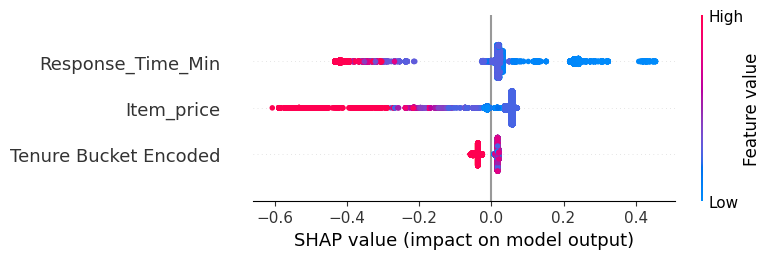

In [ ]:
import shap

explainer = shap.Explainer(grid_search_xgb.best_estimator_)
shap_values = explainer(X_test)

# Global feature importance summary
shap.summary_plot(shap_values, X_test)

From the above visualization, the top features are Response_Time_Min, Item_price and Tenure Bucket Encoded.

Response_Time_Min is most impactful feature on model predictions. Low response times (blue) push the model toward higher satisfaction (right side) and high response times (red) push predictions toward dissatisfaction (left side) means faster response time improves customer satisfaction, while delays increase dissatisfaction risk.

Low item prices (blue) push the prediction slightly toward satisfaction (right), whereas high item prices (red) push predictions slightly toward dissatisfaction (left) means expensive items may lead to higher dissatisfaction if issues arise possibly due to higher expectations or refund complexity.

Agents with low tenure (red) slightly lean toward dissatisfaction whereas higher tenure (blue) values show a neutral or slightly positive impact means new agents are more likely to get dissatisfied customers, possibly due to unfamiliarity or less experience.

Actions to be taken:

Prioritize reducing response time across all issue categories.

Design special support flow for high-value orders (e.g., expensive items).

Arrange workshops for new agents.

In [ ]:
#Get shap values
explainer = shap.Explainer(xgb_clf)
shap_values = explainer(X_test)

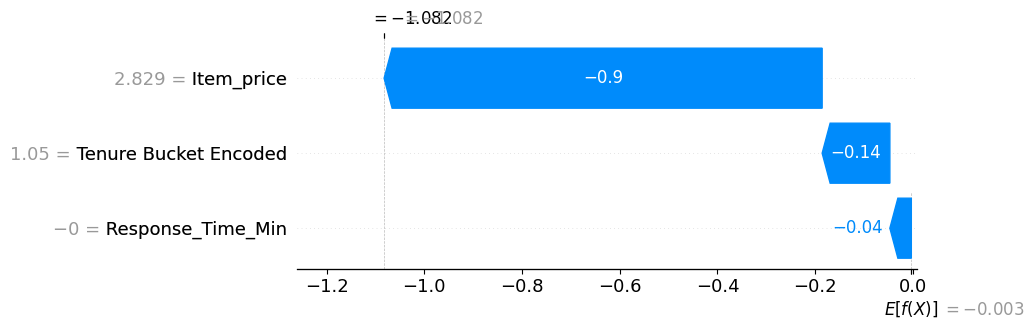

In [ ]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

This visualization tells us how different features pushed the prediction away from the average prediction.

E[f(X)] = -0.003, this is the expected value of the model's output (i.e., the baseline prediction across the dataset). A value close to 0 suggests neutral class probability.

Model Output = -1.08, this is the final output (log-odds or SHAP logit) from the model for this specific data point. A more negative value typically correlates to a "dissatisfied" class prediction.

The model predicted this customer as dissatisfied, mainly because

The item was expensive, which heavily influenced dissatisfaction.

The agent likely had a short tenure.

Although response time was quick, it couldn't offset the negative impact of price and tenure.

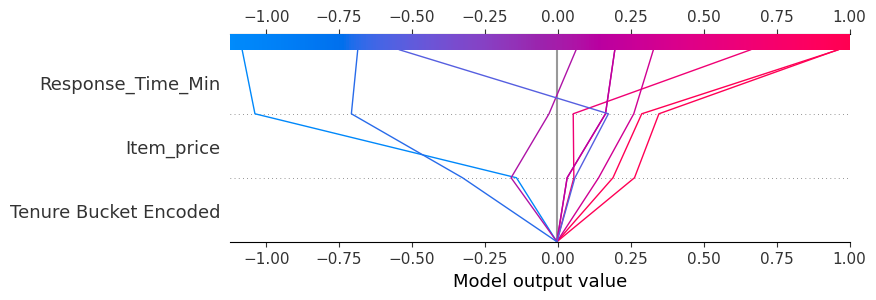

In [ ]:
# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X_test.columns))

This SHAP decision plot shows how individual feature values influence the model’s predictions for the first 10 customers in our test dataset, based on the XGBoost model.

Each line represents a customer and shows how their feature values cumulatively move the model prediction from the expected value (baseline) toward the final prediction.

Insights from the visualization: expensive products often contribute to dissatisfaction, quick responses tend to improve satisfaction and low tenure of agents tends to dissatisfaction.

Actionable Business Insights
1. Improve Response Time:

- Deploy additional support agents during peak hours.

- Use AI-assisted responses to handle FAQs quickly.

- Measure and reduce average query resolution time.

2. Handle High-Priced Orders with Care:

- Proactively follow up with customers who purchase high-value items.

- Assign experienced agents for escalations involving expensive products.

3. Support Low-Tenure Agents Effectively

- Provide focused training and mentoring for newly onboarded agents.

- Implement real-time support tools and knowledge bases to assist less experienced staff.

- Monitor performance closely and gradually increase case complexity as agent tenure grows.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Key Findings from EDA & Insights:

- Delayed responses, agent quality, and support channel significantly influenced satisfaction.

- Poor feedback scores, long resolution times, and escalations were strong indicators of dissatisfaction.

- Features like feedback rating, response time, query category, and agent behavior emerged as crucial in identifying dissatisfied customers.

- Support through live chat yielded better satisfaction compared to email-based channels.

Recommended Actions to Improve CSAT:

- Improve resolution time and agent responsiveness.

- Proactively collect feedback and analyze negative sentiment trends.

- Provide targeted training to agents handling escalations.

- Prioritize fast query resolution during peak hours.

- Introduce support quality alerts based on prediction scores.

- Customers who received personalized and prompt responses had significantly higher satisfaction scores.

Machine Learning Modeling:

- Built and evaluated three classification models (e.g., Logistic Regression, Random Forest, and XGBoost).

- XGBoost gave the best results.

- The model performs very well for predicting satisfied customers, and reasonably for dissatisfied customers, especially given the class imbalance.

- No overfitting observed—train and test metrics were consistent.

- Model performance is limited by smaller dataset size. With more labeled data, especially from dissatisfied customers, performance can be improved.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***